# Logistic Regression

This is a basic implementation of a Logistic Regression algorithm.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
from tqdm.auto import tqdm

## Data Points
Here a super basic dataset in order to test the algorithm.

In [5]:
n_points = 100
max_x = 100
overlap = 10
positive_ratio = 0.6

train_ratio = 0.7

In [6]:
n_pos_points = n_points * positive_ratio
n_neg_points = n_points - n_pos_points

pos_max = positive_ratio * max_x + overlap
neg_min = pos_max - 2 * overlap

In [7]:
pos_max, neg_min, n_pos_points, n_neg_points

(70.0, 50.0, 60.0, 40.0)

In [8]:
X_positive = np.linspace(0, pos_max, n_pos_points)
X_negative = np.linspace(neg_min, max_x, n_neg_points)
X = np.concatenate((X_positive, X_negative))
y = np.array([0 if x in X_negative else 1 for x in X])

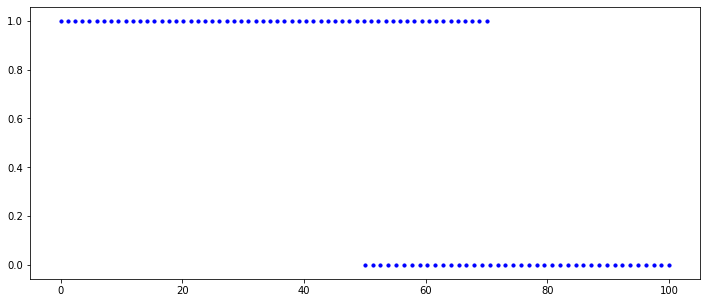

In [9]:
plt.figure(figsize=(12, 5))

plt.scatter(X, y, color="blue", s=10)
plt.show()

In [10]:
n_train_points = int(train_ratio * n_points)

train_indices = random.sample(range(n_points), k=n_train_points)
test_indices = np.setdiff1d(range(n_points), train_indices)

n_test_points = len(test_indices)


train_X, train_y = X[train_indices], y[train_indices]
test_X, test_y = X[test_indices], y[test_indices]

In [11]:
assert 1 in train_y and 0 in train_y
assert 1 in test_y and 0 in test_y

In [12]:
n_train_points, n_test_points

(70, 30)

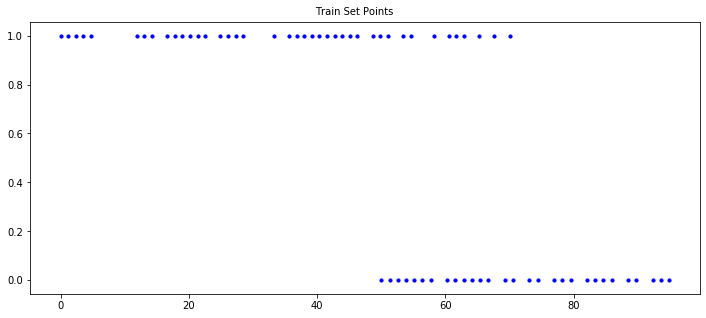

In [13]:
plt.figure(figsize=(12, 5)).text(.5, .9, "Train Set Points", ha='center')
plt.scatter(train_X, train_y, color="blue", s=10)

plt.show()

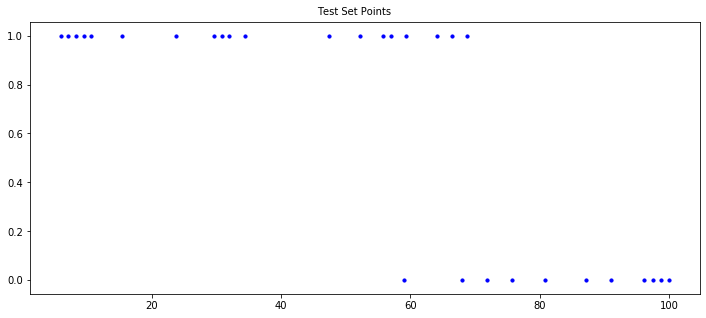

In [14]:
plt.figure(figsize=(12, 5)).text(.5, .9, "Test Set Points", ha='center')

plt.scatter(test_X, test_y, color="blue", s=10)
plt.show()

## Fitting The Model
After instantiating it, the model can be fitted to the input data through the fit method. A call of the fit method performs learning through a specified number of epochs, the method returns the value of the binary crossentropy error of the last epoch averaged over all the training samples.

In [15]:
column_X_train = train_X.reshape(-1, 1)
column_X_test = test_X.reshape(-1, 1)

In [16]:
from LogisticRegression import LogisticRegression

In [17]:
lr = LogisticRegression(dim=1)

In [18]:
error = lr.fit(train_X, train_y, learning_rate=0.001, epochs=1)
print(f'Avg BCE error: {error}')

Avg BCE error: 0.6833653786845525


In [19]:
n_epochs = 10000

In [20]:
train_mses = [lr.fit(train_X, train_y, learning_rate=0.001, epochs=1) for i in tqdm(range(n_epochs))]

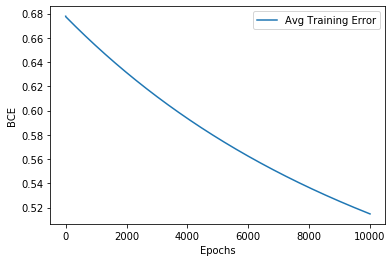

In [21]:
plt.plot(range(n_epochs), train_mses, label='Avg Training Error')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.legend()
plt.show()

In [22]:
print(f'Final Avg Training Error: {train_mses[-1]}')

Final Avg Training Error: 0.5147960877805204


## Evaluating the Classifier

In [23]:
B = lr.get_params()

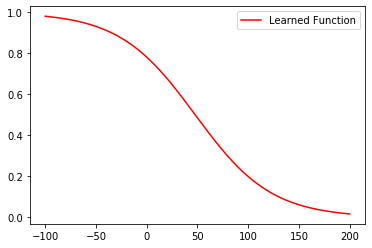

In [24]:
x_axis = np.linspace(-max_x, 2*max_x, 500)

ys = [1./(1+np.exp(-B[0]-B[1]*x)) for x in x_axis]

plt.plot(x_axis, ys, color='red', label="Learned Function")

plt.legend()
plt.show()

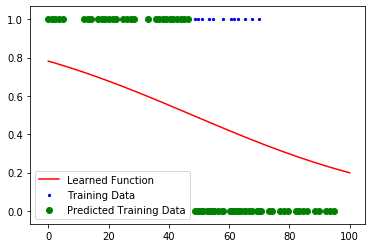

In [25]:
x_axis = np.linspace(0, max_x, 100)

plt.plot(x_axis, lr.predict(x_axis, add_bias=True), color='red', label="Learned Function")

plt.scatter(train_X, train_y, color='blue', label="Training Data", s=5)
plt.scatter(train_X, lr.predict(train_X, add_bias=True, thresholded=True), color='green', label="Predicted Training Data")

plt.legend()
plt.show()

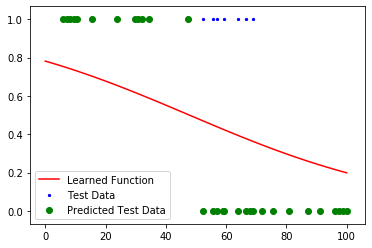

In [26]:
x_axis = np.linspace(0, max_x, 100)

plt.plot(x_axis, lr.predict(x_axis, add_bias=True), color='red', label="Learned Function")

plt.scatter(test_X, test_y, color='blue', label="Test Data", s=5)
plt.scatter(test_X, lr.predict(test_X, add_bias=True, thresholded=True), color='green', label="Predicted Test Data")

plt.legend()
plt.show()

In [27]:
print(f'Final Avg Test Error: {lr.get_cost(test_X, test_y, add_bias=True)}')

Final Avg Test Error: 0.49362957861251866
